<h1 align="center" style="color:#FF0800">
 Обробка та аналіз БМД.<br>
 Группа: БС-83<br>
 Мельничук Я.O.<br>
 Практикум Номер 8<br\></h1>

Завдання:

1. Розрахувати та вивести у вигляді таблиці статистичні характиристики даних (середні та стандартні відхилення для кожної з груп).

In [3]:
import scipy.stats as ss
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
table1=[]
table1 = [27,39,30,16,35,23]
table2=[]
table2 = [21,25,13,18,27,24]
table3=[]
table3 = [19,30,11,8,26,12]

df = pd.DataFrame({
    '1 -"Лапка"': table1,
    '2 -"Ушастік"': table2,
    '3 -"ГАВрош"': table3
}, index=np.arange(1, len(table1)+1))
df.columns.name = 'Притулок'
df.index.name = 'День'
print('Кількість поставок корму в приют в кг')
df

Кількість поставок корму в приют в кг


Притулок,"1 -""Лапка""","2 -""Ушастік""","3 -""ГАВрош"""
День,,,
1,27,21,19
2,39,25,30
3,30,13,11
4,16,18,8
5,35,27,26
6,23,24,12


In [8]:
sum1=round((sum(table1)/len(table1)),2)
sum2=round((sum(table2)/len(table2)),2)
sum3=round((sum(table3)/len(table3)),2)

sd1=round((df['1 -"Лапка"'].std()),2)
sd2=round((df['2 -"Ушастік"'].std()),2)
sd3=round((df['3 -"ГАВрош"'].std()),2)
new_df = pd.DataFrame({
    '1 - "Лапка"': table1,
    '2 - "Ушастік"': table2,
    '3 - "ГАВрош"': table3
}, index=np.arange(1, len(table1)+1))
new_df.columns.name = 'Притулок'
new_df.index.name = 'День'
new_df.loc["Середнє:"] = [sum1,sum2,sum3]
new_df.loc["Стандартне відхилення:"] = [sd1,sd2,sd3]
new_df

Притулок,"1 - ""Лапка""","2 - ""Ушастік""","3 - ""ГАВрош"""
День,,,
1,27.00,21.00,19.00
2,39.00,25.00,30.00
3,30.00,13.00,11.00
4,16.00,18.00,8.00
5,35.00,27.00,26.00
6,23.00,24.00,12.00
Середнє:,28.33,21.33,17.67
Стандартне відхилення:,8.29,5.16,8.87


[]

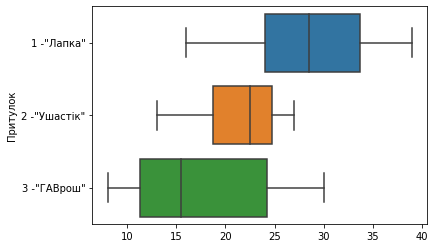

In [9]:
sns.boxplot(data=df, orient='h').set()

In [10]:
def dispersia(inf):
    c = (len(inf.iloc[0,:]))
    Tc=0
    Tc2=0
    for i in range (c):
        Tc=sum(inf.iloc[:,i])
        Tc2+=(Tc)**2
    n=0
    N=0
    for i in range(c):
        n=len(inf.iloc[:,i])
        N+=n
    summ2=0
    T=0
    
    for i in range (c):
        T=sum(inf.iloc[:,i])
        summ2+=T
    summ2=(summ2)**2
    summ1=0
    for i in range (c):
        for j in range(len(inf.iloc[:,i-1])):
            summ1+=(inf.iloc[j][i])**2
                      
    konst=summ2/N
    SSfact=(Tc2/n)-konst
    SSzag=summ1-((summ2)/N)
    SSvip=SSzag-SSfact
    dfact=c-1
    dzag=N-1
    dvip=dzag-dfact
    MSfact=SSfact/dfact
    MSvip=SSvip/dvip
    Femp=MSfact/MSvip
    if((26<(dvip) and (dvip)<= 28)):
        dvip = 26
    elif((28<(dvip) and (dvip)<= 30)):
        dvip = 27
    elif((dvip) > 30 and (dvip) <= 40):
        dvip = 28
    elif((dvip) > 40 and (dvip) <= 60):
        dvip = 29
    elif((dvip) > 60 and (dvip) <= 120):
        dvip = 30
    elif((dvip) > 120):
        dvip = 31
    else:
        dvip = dvip
        
    if(10<n  and n<= 15):
        dfact = 11
    elif(15< n and n<= 20):
        dfact = 12
    elif( 20<n and n<= 30):
        dfact = 13
    elif(n> 30):
        dfact= 14
    else:
        dfact = c - 1
    Fkrit=pd.read_excel("Таблиця критичних значень для критерію Фішера.xlsx").iloc[dvip,dfact]  
    if(Femp>=Fkrit):
        result = "Нульова гіпотеза про рівність середніх відхиляється, рівність середніх не підтверджена"
    else:
        result = "Нульова гіпотеза про рівність середніх приймається, рівність середніх підтверджена"
    new__df = pd.DataFrame({
        "Характеристика" : ['Внутрішньогрупова дисперсія ($SS_{факт}$)','Загальногрупова дисперсія ($SS_{заг}$)', 'Випадкова (залишкова) величина $SS_{вип}$',
                           'Kількість ступенів свободи: $d_{факт} = c - 1:$' ,'Kількість ступенів свободи: $d_{заг} = N - 1 :$' , 'Kількість ступенів свободи: $d_{вип}$', '$MS_{факт}: $', '$MS_{вип}: $',
                           'Значення $F_{емпір}$: ','Kритичне значення $F_{крит}$:', "Результат"],
        "Обчислене значення" : [ str(round(SSfact,2)) , str(round(SSzag,2)) ,str(round(SSvip,2)),str(dfact),str(dzag), str(dvip), str(round(MSfact,2)),str(round(MSvip,2)),str(round(Femp,2)), str(Fkrit), result]})
    
    return new__df

In [11]:
dispersia(df)

FileNotFoundError: [Errno 2] No such file or directory: 'Таблиця критичних значень для критерію Фішера.xlsx'